<a href="https://colab.research.google.com/github/marcosmrego/Python/blob/master/API_Banco_Central.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,8)

In [4]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

In [5]:
ipca = consulta_bc(433)

In [6]:
igpm = consulta_bc(189)

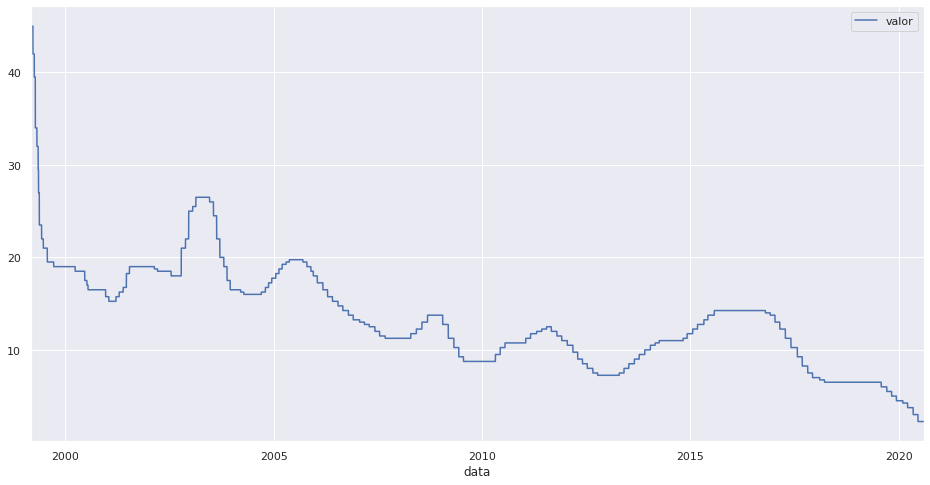

In [7]:
selic_meta = consulta_bc(432)
selic_meta.plot()

In [8]:
reservas_internacionais = consulta_bc(13621)

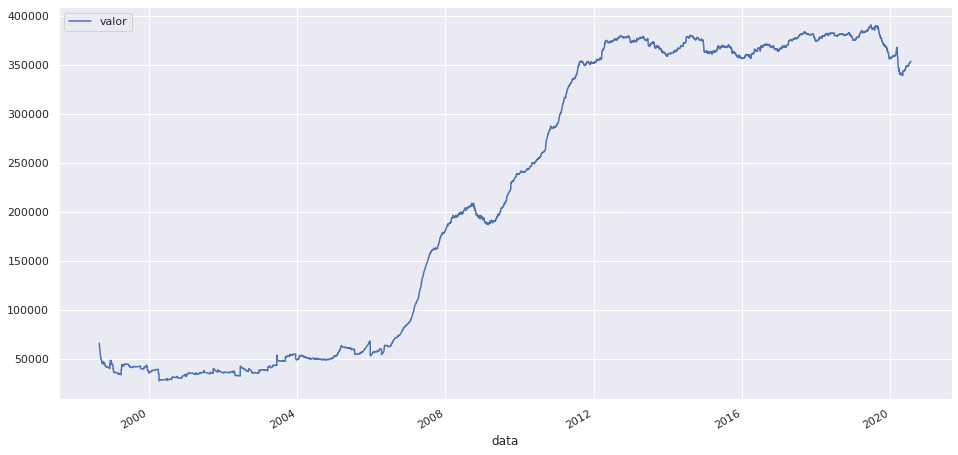

In [9]:
reservas_internacionais.plot()

In [10]:
pnad = consulta_bc(24369)
pnad

,valor
data,
2012-03-01,7.9
2012-04-01,7.7
2012-05-01,7.6
2012-06-01,7.5
2012-07-01,7.4
...,...
2020-01-01,11.2
2020-02-01,11.6
2020-03-01,12.2


In [11]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=77703731473b246b7a180878c1d3f39c76b5e9ea5dfa25cbc8af33ca7a6d34b5
  Stored in directory: /tmp/pip-ephem-wheel-cache-gy11sayl/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [13]:
ibov = yf.download(tickers='^BVSP')[['Adj Close']]

[*********************100%***********************]  1 of 1 completed


In [14]:
ibov_retorno = ibov.pct_change()

In [15]:
cdi = consulta_bc(12)

In [16]:
data_inicio = '2018-01-01'

In [17]:
ibov_retorno_acumulado = (1 + ibov_retorno[ibov_retorno.index >= data_inicio]).cumprod()
ibov_retorno_acumulado.iloc[0] = 1

In [18]:
cdi_acumulado = (1 + cdi[cdi.index >= data_inicio] / 100).cumprod()
cdi_acumulado.iloc[0] = 1

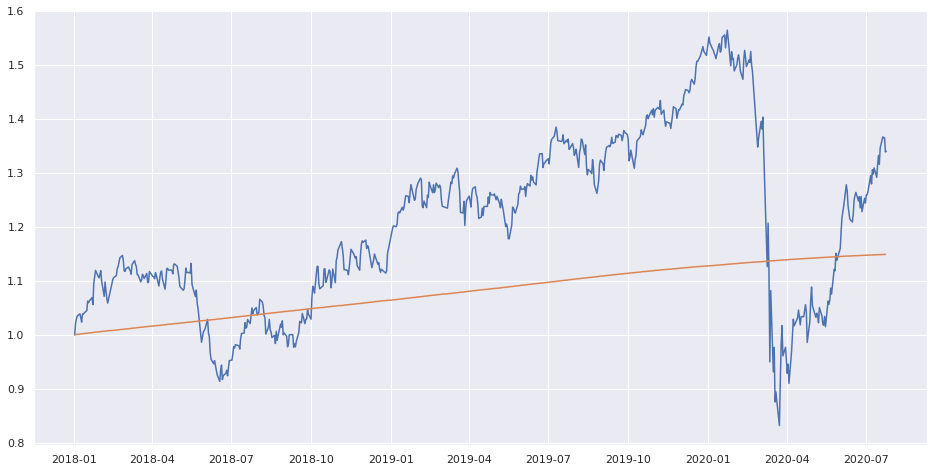

In [19]:
fig, ax = plt.subplots()
ax.plot(ibov_retorno_acumulado)
ax.plot(cdi_acumulado);